In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sys, os

2024-03-29 17:20:03.795553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **Defining notebook constants**

In [2]:
DATAFILE_DIR = "/home/s1835083/Desktop/report_4_data/"
KEYS = {
    "features" : ["lep1_pt", "lep2_pt", "fatjet_pt", "fatjet_eta", "fatjet_D2", "Zll_mass", "Zll_pt", "MET", "reco_zv_mass"],
    "targets"  : ["isSignal"],
    "weights"  : ["FullEventWeights"],
} 

# **Dataloading**

We will first load the dataframes and set up a system to access them in loops in order to run one function to apply things to all four datarames (cuts, plotting etc)

In [3]:
# Load in data from csv
print(os.listdir(DATAFILE_DIR))

def load_data(data_directory):
    """
    Function which will load in all 4 csv files as a pandas dataframe.
    """
    
    # Make list containg directory of all csv files
    file_names = [DATAFILE_DIR + file_name for file_name in os.listdir(data_directory)]
    
    # Make list containing the key for each csv file
    data_keys = [key.rsplit(".")[0] for key in os.listdir(data_directory)]

    # Define dictionary which will contain each pandas dataframe
    dataset_dictionary = {}

    # Load in the CSV files by iterating over all files in list
    for key, file_name in zip(data_keys, file_names):
        dataset_dictionary[key] = pd.read_csv(file_name, sep=",", header=0, comment="#", index_col=0)
    return dataset_dictionary

# Load in the datasets
dataset_dictionary = load_data(DATAFILE_DIR)


['Top.csv', 'Zjets.csv', 'Diboson.csv', 'ggH1000.csv']


Now we explore the datasets. We will print the dataset, remove nans

In [4]:
# Remove Nans for all dataframes
def remove_nans(dataset_dictionary):
    """
    Remove all nans in a dicionary containing multiple pandas dataframes
    """    

    # iterate over all datasets
    for key in dataset_dictionary:
        # Remove entries with nans
        dataset_dictionary[key].dropna(inplace=True)

remove_nans(dataset_dictionary)


In [5]:
dataset_dictionary["Top"].head(6)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,2.004522e-09,51609.760,1,35253.492,35612.324,0.109581,1.435712,461309.30,-1.195378,2.909157,...,0.164823,1.042927,38513.980,11072.072,1,-0.665443,-0.969063,9003.888,245723.92,-1.0
1,1.822626e-09,225038.800,1,20311.205,38644.793,0.090346,2.403266,276659.70,0.387434,3.050592,...,-1.871251,0.601309,34191.734,34626.312,1,-1.975266,1.798074,9425.637,351938.88,-1.0
2,1.552981e-09,27090.697,1,134715.500,244261.840,0.212569,1.336584,900965.50,-1.822714,-0.619062,...,0.701193,2.446600,254871.310,17551.730,-1,-0.196344,0.185058,17218.764,1046120.90,-1.0
3,1.660535e-09,57572.890,0,69086.836,90045.625,0.133918,1.780693,596016.20,-1.725750,-2.554189,...,-2.305750,0.627527,84608.050,10652.912,1,-0.413642,1.657720,9801.820,301995.70,-1.0
4,1.461494e-09,123177.900,0,51731.508,52780.684,0.101556,3.398984,590811.44,1.477704,1.432744,...,-0.685020,-2.360906,50720.953,15453.791,-1,0.880629,2.436030,10932.975,376986.28,-1.0
5,1.576159e-09,98333.990,0,89109.414,212724.310,0.059959,2.532302,451751.90,0.974108,2.452633,...,0.333825,-0.365517,220837.450,8537.216,-1,-0.299989,2.663995,8166.340,545581.60,-1.0


In [6]:
dataset_dictionary["Zjets"].head(6)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0
5,0.704353,94781.164,1,94600.330,48894.625,0.247482,1.677811,574204.06,-1.678710,0.981993,...,2.333092,0.980305,76983.830,138304.800,1,2.230367,-1.924963,29392.895,1083458.90,-1.0


In [7]:
dataset_dictionary["Diboson"].head(6)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.387345,41920.540,0,187549.810,374316.600,0.127114,1.786927,353161.47,-0.001591,1.914456,...,1.677279,-1.346853,369495.34,12147.315,1,-0.686657,-2.412152,9755.2705,1014320.10,-1.0
1,0.172328,225618.530,0,13106.807,51429.535,0.269517,2.296220,357617.66,-1.066937,-0.145452,...,-2.057147,2.975854,36972.74,34980.440,-1,-1.521354,2.819377,14584.7360,240295.97,-1.0
2,0.371392,42284.125,0,84519.230,153790.270,0.051175,3.360730,345472.30,0.704825,-2.816466,...,-0.285897,-0.084159,146895.95,24618.990,-1,0.741342,1.177780,19119.7030,471285.40,-1.0
3,0.309902,42735.938,1,76138.640,102611.836,0.117028,0.702838,476446.80,0.095546,1.012053,...,-0.160614,-2.544057,109699.72,22303.861,1,-1.648011,1.120479,8277.4480,495503.10,-1.0
4,0.202772,70475.780,0,86138.000,141886.280,0.053951,3.634348,799487.75,-1.828396,-2.406883,...,-0.499056,0.429884,151453.40,14053.401,-1,-0.171763,2.796952,13848.2230,498823.40,-1.0
5,0.166699,50060.074,1,324188.380,406563.840,0.160387,1.412536,632674.10,-1.187918,1.416885,...,-0.741852,-2.224346,346327.66,142365.170,1,0.040018,-0.911297,142251.2500,921642.75,-1.0


In [8]:
dataset_dictionary["ggH1000"].head(6)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,2.042860,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,-0.817613,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,-2.133300,...,1.217848,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,2.701475,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,-0.926707,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90
5,0.074408,31344.623,1,96002.46,477601.20,0.088743,1.179056,503239.03,0.173189,0.780732,...,0.640766,-2.372935,382829.56,158055.970,-1,1.067397,-2.121567,97214.29,1021392.80,1000000.70


Now we will plot the features we will use to train the network to visualise the distributuo for each dataset

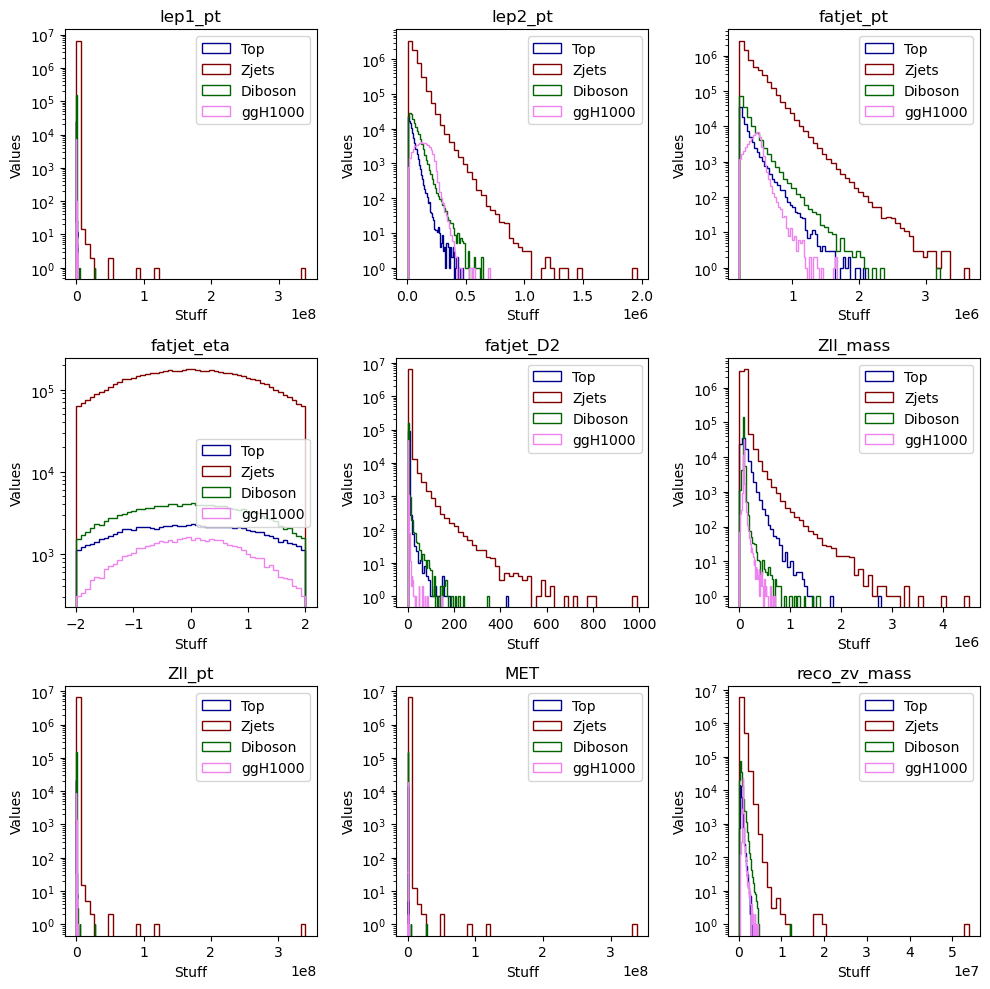

In [9]:
# Define plotting parameters for each dataset
colors = ["darkblue", "maroon", "darkgreen", "violet"]
labels = dataset_dictionary.keys()

fig, ax = plt.subplots(3, 3, figsize=(10,10))

# Iterate over every axis in the subplot to pot a specific kinematic parameter
for parameter_key, axis in zip(KEYS["features"], ax.flatten()):

    # Iterate over the datasets
    for label, color, dataset_key in zip(labels, colors, dataset_dictionary.keys()):
        axis.hist(dataset_dictionary[dataset_key][parameter_key], bins=50, histtype="step", log=True, label=label, color=color)
        axis.legend()
        axis.set(
            title=parameter_key,
            ylabel="Values",
            xlabel="Stuff"
        )

plt.tight_layout()

Now we define cuts which we will apply to each kinematic parameter in each dataset

We will define each cutoffs in a dictionary in order to facilitate applying the cuts

In [19]:
# Define the cuts
cuts = {
    "lep1_pt":{
        "Top": 0.5e7,
        "Zjets": 3e6,
        "Diboson": 0.5e7,
        "ggH1000": 0.5e7,
    },
    "lep2_pt":{
        "Top": 0.45e6,
        "Zjets": 0.9e6,
        "Diboson": 0.5e6,
        "ggH1000": 0.5e6,
    },
    "fatjet_pt":{
        "Top": 2e6,
        "Zjets": 2.9e6,
        "Diboson": 2e6,
        "ggH1000": 1.3e6,
    },
    "fatjet_D2":{
        "Top": 150,
        "Zjets": 400,
        "Diboson": 150,
        "ggH1000": 80,
    },
    "Zll_mass":{
        "Top": 1.5e6,
        "Zjets": 2.5e6,
        "Diboson": 0.9e6,
        "ggH1000": 0.7e6,
    },
    "Zll_pt":{
        "Top": 1.2e6,
        "Zjets": 1.5e6,
        "Diboson": 1.8e6,
        "ggH1000": 1.2e6,
    },
    "MET":{
        "Top": 0.08e7,
        "Zjets": 0.4e7,
        "Diboson": 0.08e7,
        "ggH1000": 0.08e7,
    },
}

In [20]:
# Apply the cuts
for cut_key in cuts.keys():
    for dataset_key in dataset_dictionary.keys():
        query_string = f"{cut_key} < {cuts[cut_key][dataset_key]}"
        dataset_dictionary[dataset_key] = dataset_dictionary[dataset_key].query(query_string)

Plot after cuts

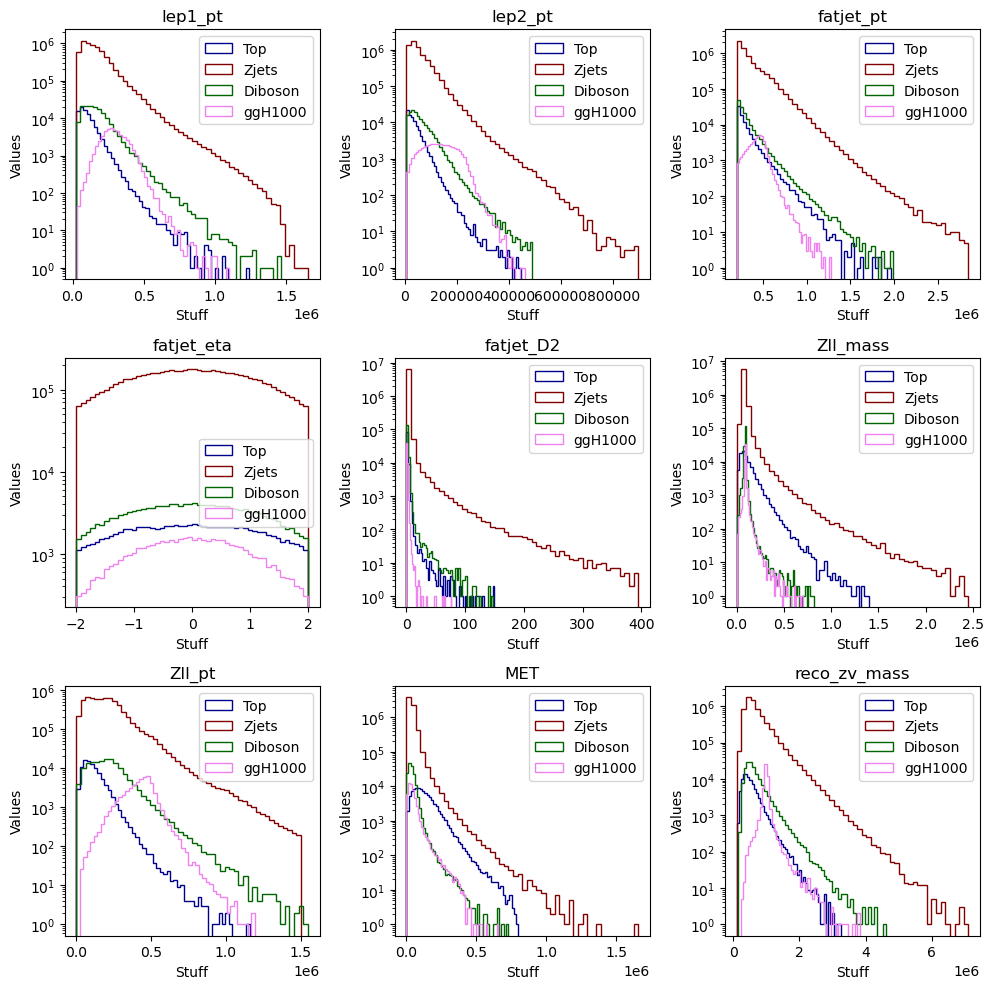

In [21]:
# Define plotting parameters for each dataset
colors = ["darkblue", "maroon", "darkgreen", "violet"]
labels = dataset_dictionary.keys()

fig, ax = plt.subplots(3, 3, figsize=(10,10))

# Iterate over every axis in the subplot to pot a specific kinematic parameter
for parameter_key, axis in zip(KEYS["features"], ax.flatten()):

    # Iterate over the datasets
    for label, color, dataset_key in zip(labels, colors, dataset_dictionary.keys()):
        axis.hist(dataset_dictionary[dataset_key][parameter_key], bins=50, histtype="step", log=True, label=label, color=color)
        axis.legend()
        axis.set(
            title=parameter_key,
            ylabel="Values",
            xlabel="Stuff"
        )

plt.tight_layout()